##Mount Drive

In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')

if not os.path.isdir("/content/small"):
    !jar xvf "/content/drive/MyDrive/sf-xs.zip"

##Set up GitHub files

In [ ]:
!git clone https://github.com/Spidersaw/AML23-CosPlace.git

In [ ]:
!pip install -r AML23-CosPlace/requirements.txt

In [ ]:
%cd AML23-CosPlace
!git pull

##Visualize labels

In [ ]:
#Visualize classes ids, made of: (UTM east, UTM north, heading)

# 1UTM coordinates are defined by a system used to identify locations
# on earth in meters, where 1 UTM unit corresponds to 1 meter. They can
# be extracted from GPS coordinates (i.e., latitude and longitude) and allow
# approximating a restricted area of the earth’s surface on a flat surface.

from notes import get_groups

groups = get_groups()

for g in groups:
  print(g.classes_ids)

[(550950, 4179950, 0), (550600, 4181600, 0), (546050, 4180950, 0), (546250, 4176350, 0), (546350, 4183800, 0), (549900, 4176050, 0), (550000, 4183500, 0), (547000, 4180600, 0), (553300, 4182850, 0), (544950, 4181500, 0), (543650, 4177100, 0), (547600, 4177700, 0), (552300, 4176450, 0), (546300, 4175050, 0), (552250, 4178950, 0), (552550, 4181800, 0), (546850, 4183450, 0), (543800, 4175450, 0), (545550, 4179050, 0), (550050, 4182200, 0), (550500, 4183150, 0), (548450, 4184050, 0), (544700, 4177350, 0), (546550, 4174250, 0), (549150, 4181250, 0), (549600, 4182200, 0), (549250, 4183800, 0), (551100, 4180700, 0), (553250, 4181900, 0), (554250, 4177100, 0), (551400, 4178650, 0), (548750, 4174150, 0), (547050, 4173900, 0), (553350, 4176150, 0), (550750, 4183100, 0), (549850, 4176300, 0), (552400, 4173850, 0), (548200, 4173550, 0), (554500, 4175800, 0), (552500, 4181300, 0), (546200, 4184400, 0), (553750, 4181550, 0), (549850, 4184100, 0), (543200, 4181500, 0), (553500, 4181850, 0), (552250, 

##Plot distribution of classes

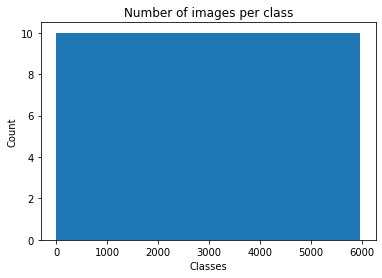

In [ ]:
#Visualize number of images for each class in a histogram plot

%matplotlib inline

from notes import get_groups
import matplotlib.pyplot as plt

def get_count(classes, images):
    #return list containing [class_index]*no.instances per class
    #[0,0,0,0...,1,1,1,...,2,2,2,2....]
    count = []
    for i in range(int(len(classes))):
      count.extend([i]*len(images[classes[i]]))
    return count

def plot_histogram(classes, images):
    #x = classes
    #y = num. of images

    count = get_count(classes,images)
        
    plt.figure()
    plt.title("Number of images per class")
    plt.xlabel("Classes")
    plt.ylabel("Count")
    
    plt.hist(count, bins=range(int(len(classes))+1), alpha=1)
    plt.savefig('%s/%s.jpeg' % ('/content','no_images_per_class'))
    plt.show()

groups = get_groups()

for g in groups:
  plot_histogram(g.classes_ids, g.images_per_class)

##Show some images

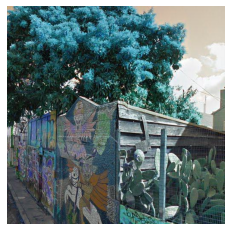

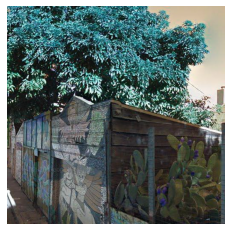

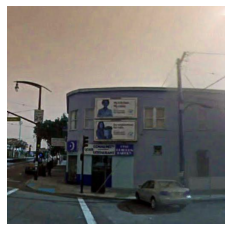

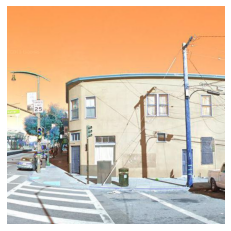

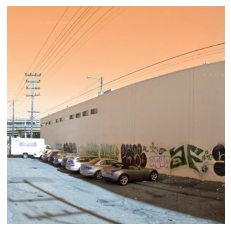

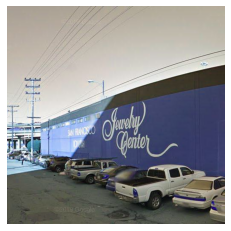

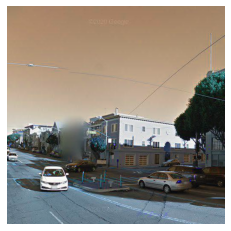

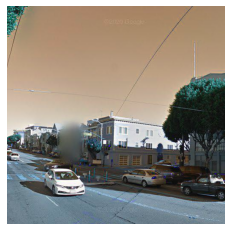

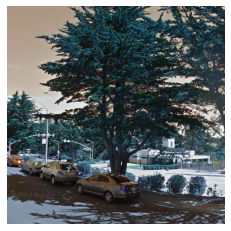

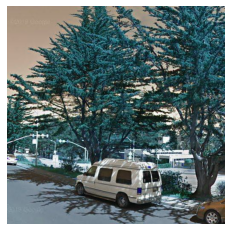

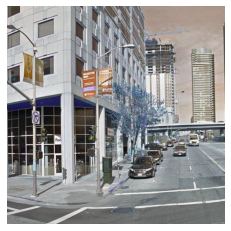

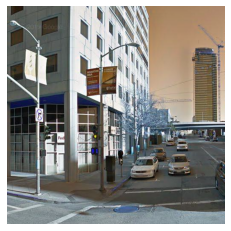

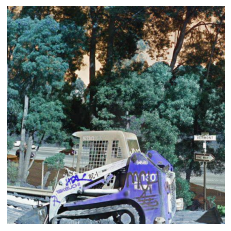

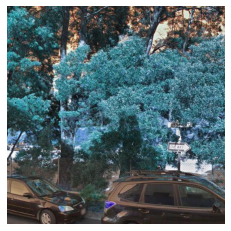

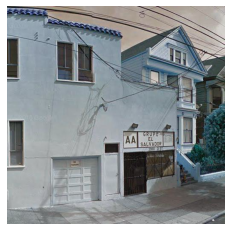

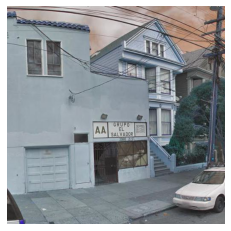

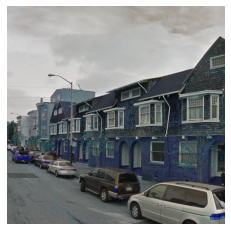

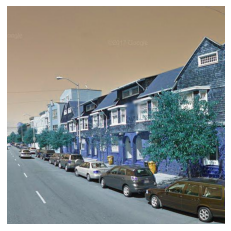

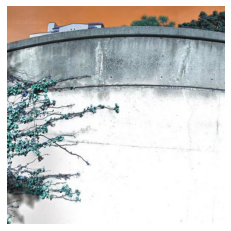

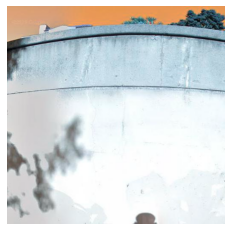

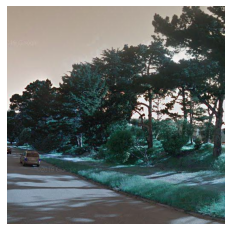

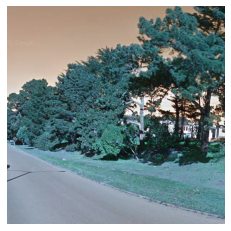

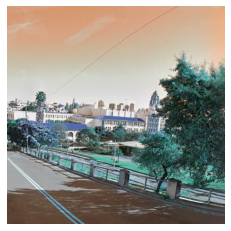

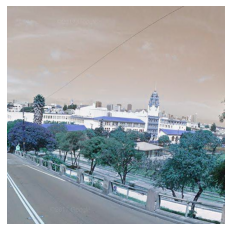

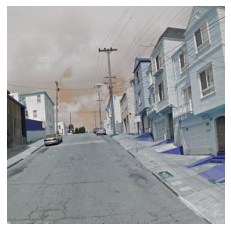

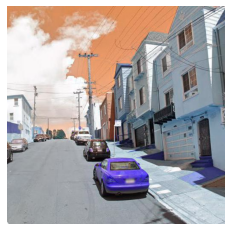

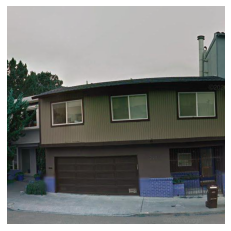

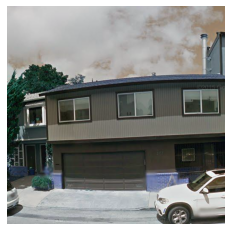

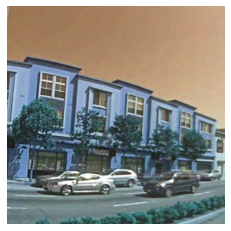

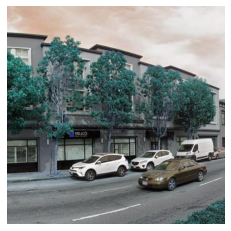

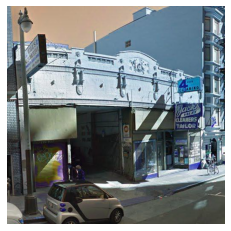

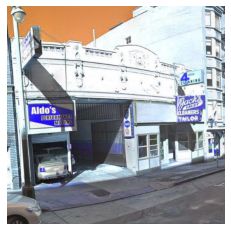

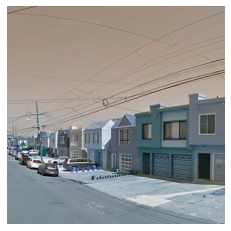

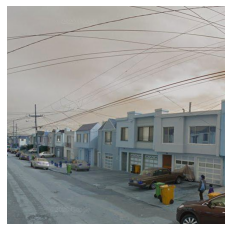

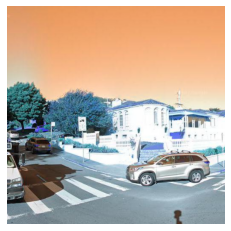

KeyboardInterrupt: ignored

In [84]:
from notes import get_groups
import matplotlib.pyplot as plt
import cv2

def show_image(img_path):
  img_color = cv2.imread(img_path,1)
  plt.imshow(img_color)
  plt.axis("off")
  #plt.savefig('%s/%s.jpeg' % ('/content/media',img_path.split("/")[5]))
  plt.show()

groups = get_groups()

for g in groups:
  classes, images = g.classes_ids, g.images_per_class

  #Getting one class every 300 (around 20 at the end),
  #so we should get batches of images from distant places
  for i in range(0, len(classes), 300):
    images_per_class = images[classes[i]]
    #Show 2 images for each selected class
    show_image(images_per_class[0])
    show_image(images_per_class[1])






##Train
TODO - re-esablish batch_size to 32 (it has been changed to 16 for a faster training)

In [ ]:
!python AML23-CosPlace/train.py --dataset_folder /content/small --groups_num 1 --epochs_num 3 --batch_size 16

2022-12-27 17:21:46   AML23-CosPlace/train.py --dataset_folder /content/small --groups_num 2 --epochs_num 3 --batch_size 16
2022-12-27 17:21:46   Arguments: Namespace(L=2, M=10, N=5, alpha=30, augmentation_device='cuda', backbone='resnet18', batch_size=16, brightness=0.7, classifiers_lr=0.01, contrast=0.7, dataset_folder='/content/small', device='cuda', epochs_num=3, fc_output_dim=512, groups_num=2, hue=0.5, infer_batch_size=16, iterations_per_epoch=10000, lr=1e-05, min_images_per_class=10, num_workers=8, positive_dist_threshold=25, random_resized_crop=0.5, resume_model=None, resume_train=None, saturation=0.7, save_dir='default', seed=0, test_set_folder='/content/small/test', train_set_folder='/content/small/train', use_amp16=False, val_set_folder='/content/small/val')
2022-12-27 17:21:46   The outputs are being saved in logs/default/2022-12-27_17-21-46
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0

##Commit

In [88]:
!git config --global user.email "mario.testa1999@gmail.com"
!git config --global user.name "mariotesta-dev"

!git add .
!git commit -m "update"
!git push

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
